# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [821]:
import pandas as pd  # import the neccessary libraries
pd.set_option('display.max_columns', 300)  # display all the columns
pd.set_option('display.max_rows', 100)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor  # In case we want to use k-nearest neighbor model
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn')
sns.set(style="white")

In [822]:
df = pd.read_csv('kc_house_data_train.csv')  # read in the csv file with train data
print(df.shape)  # check the dimensions of the model
df.head()  # print the first 5 rows

(17290, 22)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [823]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,8644.500000,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,4991.337413,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,0.000000,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,4322.250000,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,8644.500000,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,12966.750000,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,17289.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [824]:
#####Initial Data Cleaning -- Based Mostly off Abnormal Values

#Drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

#Add column bath/bed
df['bath_per_bed'] = np.where(df['bedrooms'] > 0, df['bathrooms'] / df['bedrooms'], 0)

#Add Log_Price
df['log_price'] = np.where(df['price'], np.log(df['price']), df['price'])

In [825]:
df[df['bath_per_bed'] > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bath_per_bed,log_price


In [826]:
#####Initial Data Cleaning -- Based Mostly off Multicolliniarity

#Drop 'sqft_above' column
df.drop(columns=['sqft_above'], inplace=True)

#Turn 'sqft_basement' into binary "Basement" column
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)

#Drop 'sqft_basement' column
df.drop(columns=['sqft_basement'], inplace=True)
df.drop(columns=['sqft_living15'], inplace=True)

In [827]:
##### Zip Codes to Bins #####

price_by_zip = df.groupby('zipcode')['price'].mean().sort_values(ascending=False)
zip_category = pd.cut(price_by_zip, bins =[0,350000,600000,900000,3500000], labels = ['low','medium','high','very_high'])
df['zip_price_level'] = df['zipcode'].apply(lambda x: zip_category.loc[x])
df['zip_price_level'].value_counts()
df = pd.get_dummies(df, columns = ['zip_price_level'], drop_first= True)

In [828]:
##### Convert Date to Year_Sold and Month_Sold ####

df['year_sold'] = df['date'].str[0:4].astype(int)
df['month_sold'] = df['date'].str[4:6].astype(int)

##### Add Season column #####

def to_season(x):
    if x == 12 or x == 1 or x == 2:
        return 'winter'
    elif x == 3 or x == 4 or x == 5:
        return "spring"
    elif x == 6 or x == 7 or x == 8:
        return "summer"
    else:
        return 'fall'
df['season_sold'] = df['month_sold'].apply(to_season)

##### Get Dummies for Season & Year Sold Columns#####
df = pd.get_dummies(df, columns = ['season_sold'], drop_first= True)
df = pd.get_dummies(df, columns = ['year_sold'], drop_first= True)

#### Drop Uneeded Columns #####
df.drop(columns=['month_sold'], inplace=True)
df.drop(columns=['date'], inplace=True)

In [829]:
##### Create Years since BuilT Column #####
df['years_old'] = 2020 - df['yr_built']
df.drop(columns=['yr_built'], inplace=True)

##### Create Years since Renovation Column #####
# After EDA showed most houses havent been renovated, changing to binary
#df['renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)
df.drop(columns=['yr_renovated'], inplace=True)

In [830]:
##### Get Dummies for Other Categorical Variables #####

#df = pd.get_dummies(df, columns = ['grade'], drop_first= True)

## Grade not a great determinant of Price

#Turn condition into binary (Good Condition = 1, Bad Condition = 0)
df['condition'] = np.where(df['condition'] > 2, 1, 0)

df = pd.get_dummies(df, columns = ['view'], drop_first= True)

In [799]:
df.dtypes

id                             int64
price                        float64
bedrooms                       int64
bathrooms                    float64
sqft_living                    int64
sqft_lot                       int64
floors                       float64
waterfront                     int64
condition                      int64
grade                          int64
zipcode                        int64
lat                          float64
long                         float64
sqft_lot15                     int64
bath_per_bed                 float64
log_price                    float64
basement                       int64
zip_price_level_low            uint8
zip_price_level_medium         uint8
zip_price_level_very_high      uint8
season_sold_spring             uint8
season_sold_summer             uint8
season_sold_winter             uint8
year_sold_2015                 uint8
year_since_built               int64
year_since_renovated           int64
view_1                         uint8
v

In [800]:
df.isnull().sum()

id                           0
price                        0
bedrooms                     0
bathrooms                    0
sqft_living                  0
sqft_lot                     0
floors                       0
waterfront                   0
condition                    0
grade                        0
zipcode                      0
lat                          0
long                         0
sqft_lot15                   0
bath_per_bed                 0
log_price                    0
basement                     0
zip_price_level_low          0
zip_price_level_medium       0
zip_price_level_very_high    0
season_sold_spring           0
season_sold_summer           0
season_sold_winter           0
year_sold_2015               0
year_since_built             0
year_since_renovated         0
view_1                       0
view_2                       0
view_3                       0
view_4                       0
dtype: int64

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

In [801]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,lat,long,sqft_lot15,bath_per_bed,log_price,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated,view_1,view_2,view_3,view_4
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.990573,7.654425,98078.193175,47.560058,-122.214258,12873.475824,0.639717,13.048109,0.393638,0.218045,0.422267,0.046501,0.302371,0.293522,0.170735,0.323135,49.207981,0.041990,0.015269,0.044824,0.023713,0.015616
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.096639,1.174718,53.607949,0.138412,0.140857,27227.437583,0.213352,0.526865,0.488570,0.412930,0.493935,0.210573,0.459298,0.455389,0.376288,0.467687,29.343516,0.200571,0.122624,0.206922,0.152158,0.123988
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,98001.000000,47.155900,-122.519000,659.000000,0.000000,11.225243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,1.000000,7.000000,98033.000000,47.471200,-122.329000,5111.250000,0.500000,12.679196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,1.000000,7.000000,98065.000000,47.571600,-122.230000,7622.500000,0.625000,13.017003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,1.000000,8.000000,98118.000000,47.677900,-122.126000,10101.750000,0.750000,13.377006,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,1.000000,13.000000,98199.000000,47.777600,-121.315000,858132.000000,2.500000,15.856731,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000


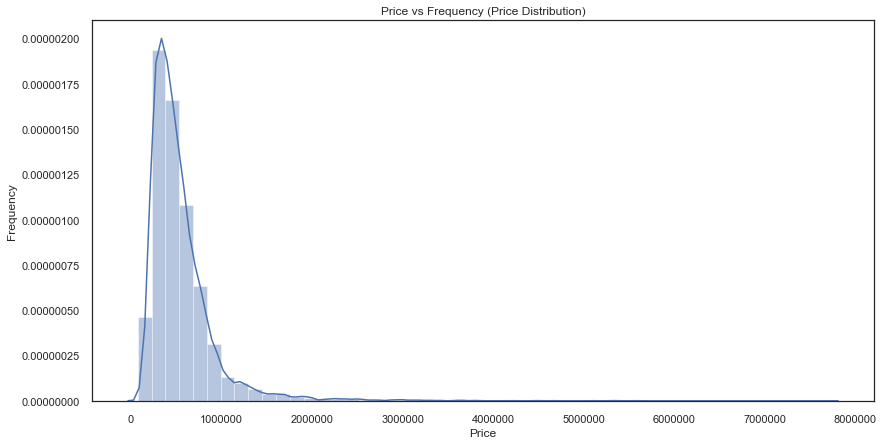

In [802]:
#Check price distribution *****
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');

### Locate Outliers

In [803]:
IQR = df.price.quantile(0.75) - df.price.quantile(0.25)

In [804]:
upper_limit = df.price.quantile(0.75) + (IQR * 1.5)
upper_limit_extreme = df.price.quantile(0.75) + (IQR * 6)
upper_limit, upper_limit_extreme

(1131000.0, 2589000.0)

In [805]:
total = np.float(df.shape[0])
print('Total Houses: {}'.format(df.price.shape[0]/total))
print('Percent of Houses priced > $1,131,000: {}'.format(df[df.price>upper_limit].shape[0]/total))
print('Percent of Houses priced > $2,589,000: {}'.format(df[df.price>upper_limit_extreme].shape[0]/total))

Total Houses: 1.0
Percent of Houses priced > $1,131,000: 0.0518796992481203
Percent of Houses priced > $2,589,000: 0.004279930595720069


In [788]:
#Test to see how it effects my data to decrease extreme outliers


df['price'] = np.where(df['price'] > upper_limit_extreme, df['price']-(df['price']*.1), df['price'])
df[df['price'] >= upper_limit_extreme]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_lot15,bath_per_bed,log_price,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated
220,5316101075,2589000.0,7,3.00,5350,14400,2.5,0,0,1,10,98112,47.6295,-122.285,7469,0.428571,14.875035,1,0,0,1,0,0,0,0,110,0
238,4114601570,2589000.0,3,3.25,5020,12431,2.0,1,4,1,10,98144,47.5925,-122.287,12620,1.083333,15.096444,1,0,0,0,0,0,0,0,79,1
260,4217402115,2589000.0,6,4.75,5480,19401,1.5,1,4,1,11,98105,47.6515,-122.277,15810,0.791667,15.110238,1,0,0,0,1,0,0,1,84,0
447,3025059124,2589000.0,5,3.50,4330,11979,1.0,0,4,1,12,98004,47.6251,-122.218,12000,0.700000,14.968848,1,0,0,1,0,1,0,0,12,0
654,3126059027,2589000.0,4,3.50,4700,13730,2.0,0,3,1,11,98033,47.6899,-122.217,15306,0.875000,14.790070,1,0,0,0,1,0,0,1,62,1
1020,2425049063,2589000.0,4,3.25,4830,22257,2.0,1,4,1,11,98039,47.6409,-122.241,25582,0.812500,15.107741,0,0,0,1,0,0,0,0,30,0
1054,3859900060,2589000.0,5,4.00,6300,16065,2.0,0,1,1,12,98004,47.5922,-122.207,17287,0.800000,14.827111,1,0,0,1,0,0,1,1,16,0
1184,1370800515,2589000.0,4,4.25,4470,5884,2.0,0,1,1,11,98199,47.6387,-122.405,6000,1.062500,14.897316,1,0,0,0,0,0,0,0,10,0
1187,1068000375,2589000.0,6,5.00,7100,18200,2.5,0,0,1,13,98199,47.6427,-122.408,6477,0.833333,14.978661,1,0,0,0,0,0,0,0,87,1
1979,8907500070,2589000.0,5,5.00,8000,23985,2.0,0,4,1,12,98004,47.6232,-122.220,21750,1.000000,15.492607,1,0,0,1,1,0,0,1,11,0


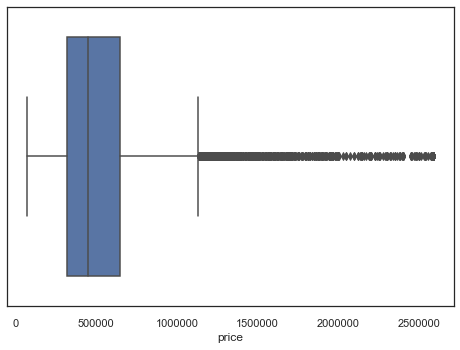

In [718]:
sns.boxplot(df.price)

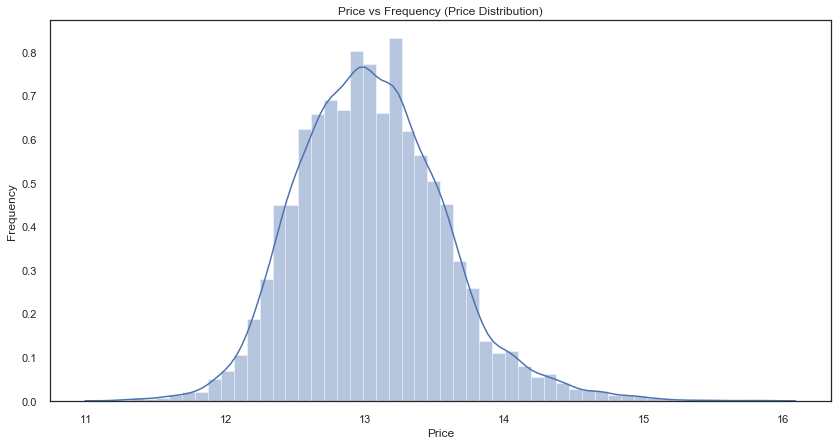

In [677]:
#Check log price distribution ***** Note: Comes out much more normally distributed
fig, ax = plt.subplots(figsize = (14,7));
sns.distplot(df.log_price, kde=True, bins=50);
ax.set(xlabel='Price', ylabel='Frequency', title='Price vs Frequency (Price Distribution)');

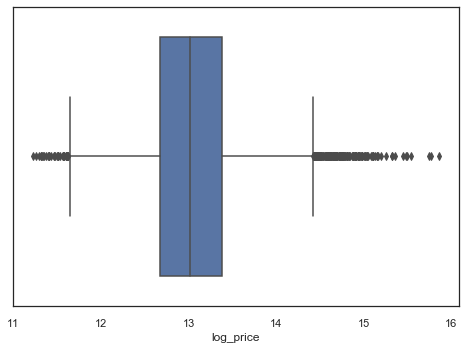

In [678]:
sns.boxplot(df.log_price)

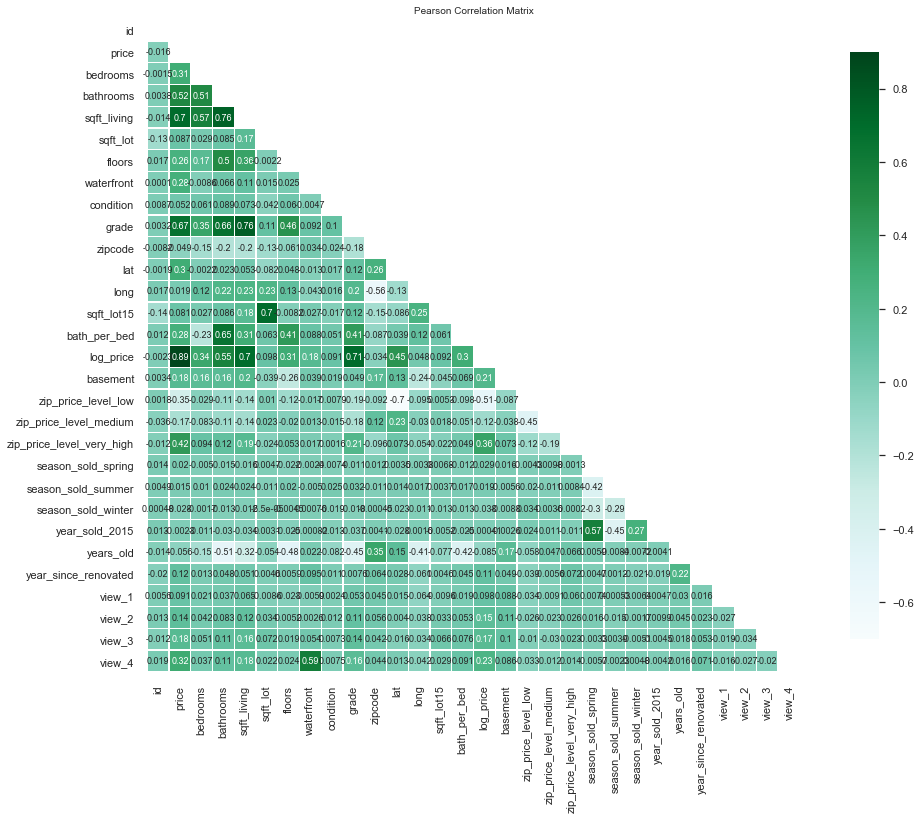

In [831]:
# let's check the correlation between the features
mask = np.zeros_like(df.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(18, 12))
plt.title('Pearson Correlation Matrix',fontsize=10)

sns.heatmap(df.corr(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":9},mask=mask,cbar_kws={"shrink": .9});
plt.show()

### Notes: 
All the sqft variables seem to have a very high correlation. Should think about dropping

Some columns useful for EDA but not Modelling
    
    Price & Log_Price
    yr_renovated & yr_since_renovated


### Below code evaluates VIF

In [807]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from patsy import dmatrices

In [808]:

features = "+".join(df.columns)
features = features.replace('price+', '', 1)
features = features.replace('log_price+', '', 1)
features = features.replace('date+', '', 1)
features = features.replace('id+', '', 1)

y, X = dmatrices('price~' + features, df, return_type='dataframe')

In [809]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [810]:
vif.sort_values(by = "VIF_Factor",ascending=False).head(10)

,VIF_Factor,features
0,4.346316e+06,Intercept
2,1.135418e+01,bathrooms
13,7.116159e+00,bath_per_bed
1,5.287071e+00,bedrooms
3,4.551944e+00,sqft_living
8,3.279040e+00,grade
15,2.992136e+00,zip_price_level_low
18,2.714954e+00,season_sold_spring
10,2.298627e+00,lat
22,2.283955e+00,year_since_built


VIF Notes: 
    
    VIF score of 'inf' means these variables show almost perfect correlation. Which proves that sqft variables show 
    multicollinearity
    
    VIF < 3 is ideal. VIF < 10 is sufficient

# Exploratory Data Analysis

## Bedrooms vs Price

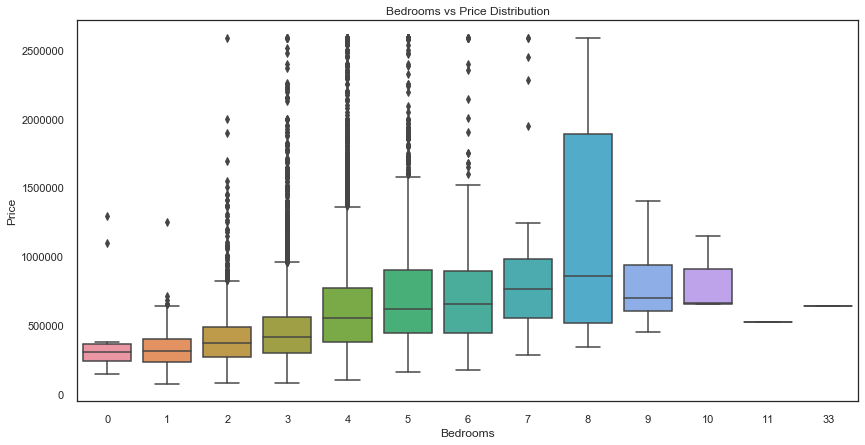

In [721]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='bedrooms', y="price", data=df)
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedrooms vs Price Distribution');

#### Need to address outliers

In [484]:
df[df['bedrooms'] == 33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_lot15,bath_per_bed,log_price,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated
8597,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,1,7,98103,47.6878,-122.331,4700,0.05303,13.369223,1,0,1,0,0,1,0,0,73,0


## Waterfront and Basement vs Price

[Text(0, 0.5, 'Price'), Text(0.5, 0, 'Basement')]

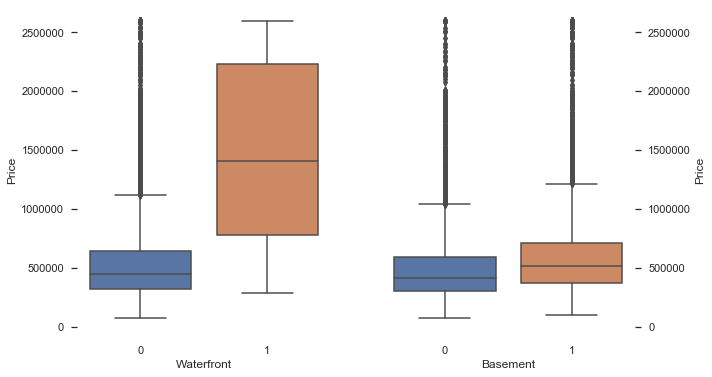

In [722]:
f, axes = plt.subplots(1, 2,figsize=(10,6))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['basement'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Basement', ylabel='Price')

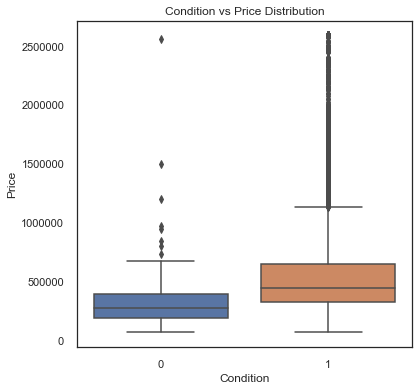

In [723]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x='condition', y="price", data=df)
ax.set(xlabel='Condition', ylabel='Price',title='Condition vs Price Distribution');

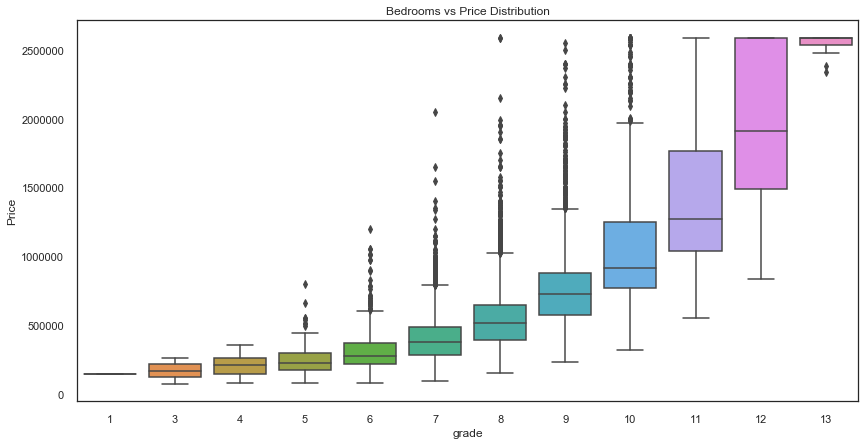

In [724]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='grade', y="price", data=df)
ax.set(xlabel='grade', ylabel='Price',title='Bedrooms vs Price Distribution');

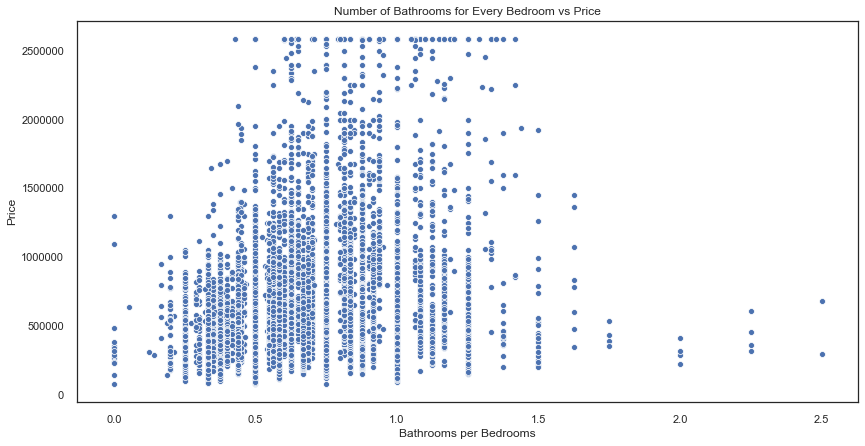

In [725]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(x='bath_per_bed', y="price", data=df)
ax.set(xlabel='Bathrooms per Bedrooms', ylabel='Price',title='Number of Bathrooms for Every Bedroom vs Price');

In [489]:
df.bath_per_bed.isnull().sum()

0

In [490]:
df[df['bathrooms'] == 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_lot15,bath_per_bed,log_price,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated
483,3374500520,355000.0,0,0.0,2460,8049,2.0,0,0,1,8,98031,47.4095,-122.168,8050,0.0,12.779873,0,1,0,0,1,0,0,1,30,0
1120,6306400140,1095000.0,0,0.0,3064,4764,3.5,0,2,1,7,98102,47.6362,-122.322,4000,0.0,13.906265,0,0,0,1,0,1,0,0,30,0
3032,7849202190,235000.0,0,0.0,1470,4800,2.0,0,0,1,7,98065,47.5265,-121.828,7200,0.0,12.367341,0,0,1,0,0,0,1,0,24,0
5424,3918400017,380000.0,0,0.0,1470,979,3.0,0,2,1,8,98133,47.7145,-122.356,1399,0.0,12.847927,0,0,1,0,0,0,1,1,14,0
9060,3421079032,75000.0,1,0.0,670,43377,1.0,0,0,1,3,98022,47.2638,-121.906,42882,0.0,11.225243,0,1,0,0,0,0,1,1,54,0
9286,2954400190,1295650.0,0,0.0,4810,28008,2.0,0,0,1,12,98053,47.6642,-122.069,35061,0.0,14.074523,0,0,0,0,0,1,0,0,30,0
10067,3980300371,142000.0,0,0.0,290,20875,1.0,0,0,0,1,98024,47.5308,-121.888,22850,0.0,11.863582,0,0,1,0,0,0,0,0,57,0
12982,203100435,484000.0,1,0.0,690,23244,1.0,0,0,1,7,98053,47.6429,-121.955,19290,0.0,13.089840,0,0,0,0,0,0,0,0,72,0


## Basic Pairplot to further visualize data

KeyboardInterrupt: 

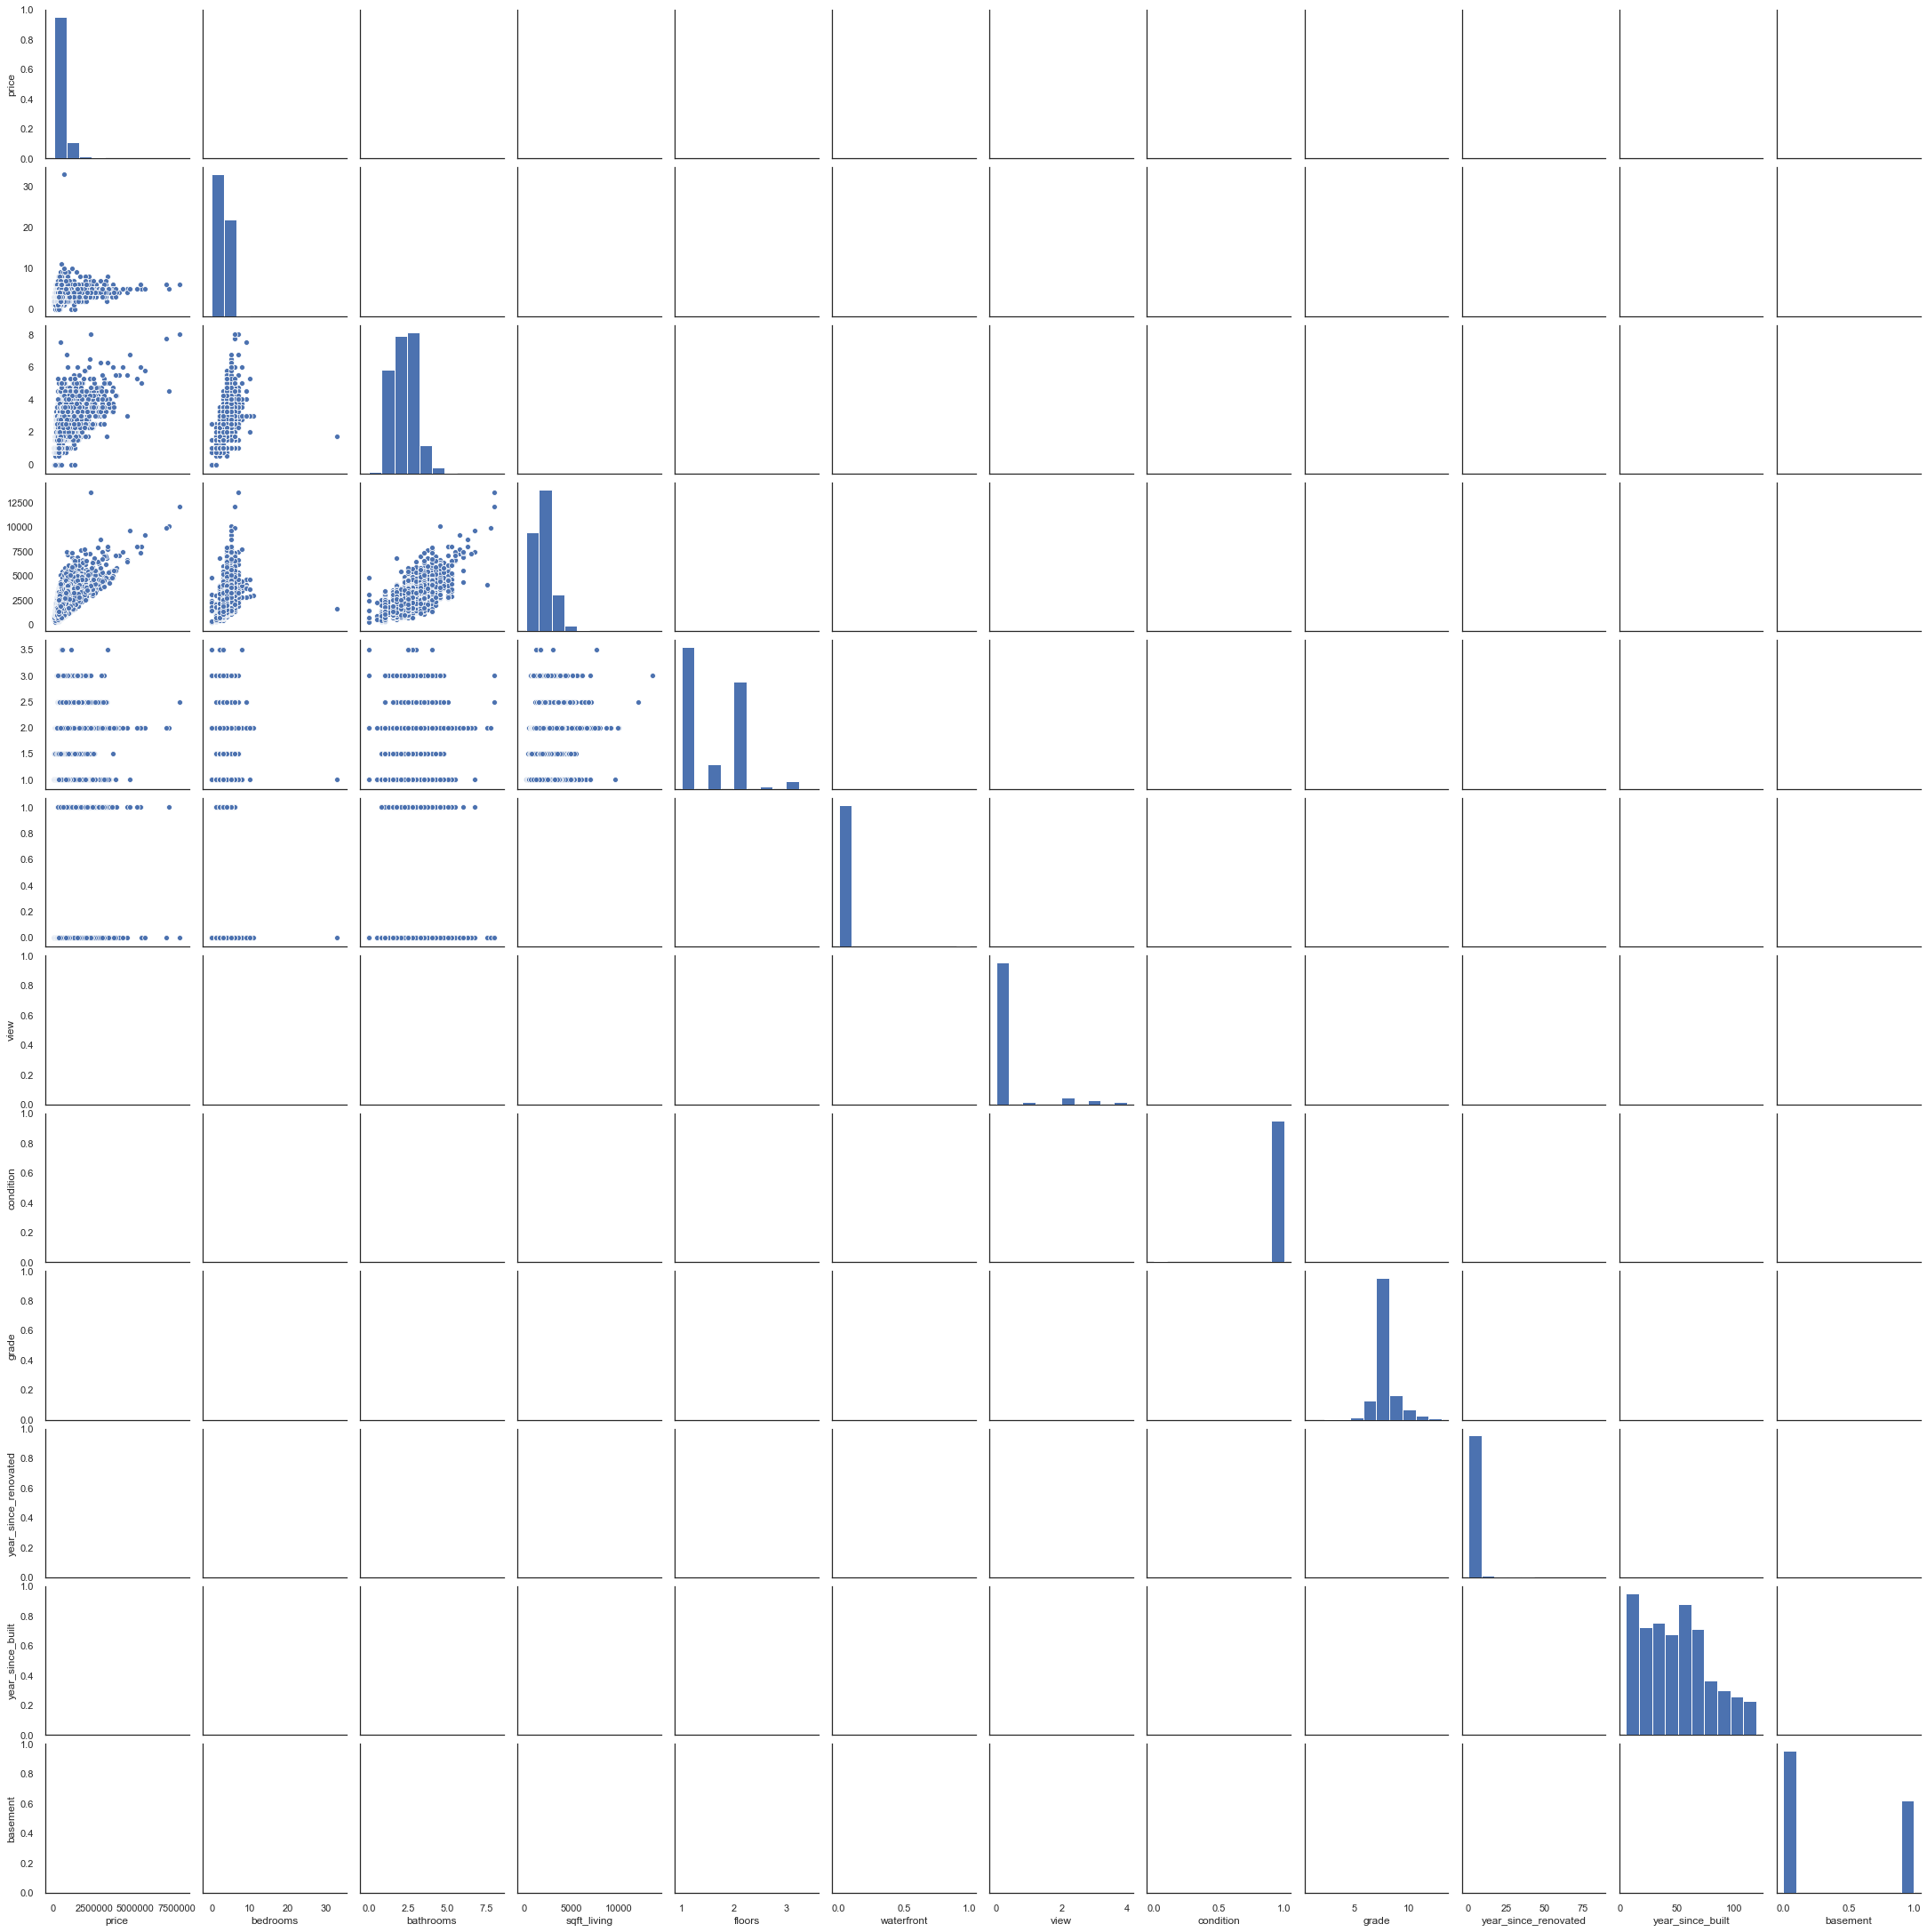

In [491]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'year_since_renovated','year_since_built',
        'basement']])

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [832]:
##### Simple Regression Model #####
features_df = df.drop(columns=['id', 'price','log_price','lat','long'])
str_features_col= "+".join(features_df)
mlr_model = smf.ols(formula=f'price~{str_features_col}', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     2166.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        00:21:59   Log-Likelihood:            -2.3409e+05
No. Observations:               17290   AIC:                         4.682e+05
Df Residuals:                   17264   BIC:                         4.684e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                 -1.681e+07   2.91e+06     -5.783      0.000   -2.25e+07   -1.11e+07
bedrooms                   -5.55e+04   3419.338    -16.230      0.000   -6.22e+04   -4.88e+04
bathrooms                   8.42e+04   6108.837     13.783      0.000    7.22e+04    9.62e+04
sqft_living                 170.6667      3.201     53.321      0.000     164.393     176.940
sqft_lot                      0.1487      0.047      3.186      0.001       0.057       0.240
floors                    -1385.2579   3531.612     -0.392      0.695   -8307.575    5537.059
waterfront                 5.153e+05   1.96e+04     26.356      0.000    4.77e+05    5.54e+05
condition                  2.064e+04   1.46e+04      1.415      0.157   -7949.428    4.92e+04
grade                      7.616e+04   2133.515     35.696      0.000     7.2e+04    8.03e+04
zipcode                     167.7153     29.655      5.656      0.000     109.589     225.841
sqft_lot15                   -0.3586      0.073     -4.917      0.000      -0.502      -0.216
bath_per_bed              -1.469e+05   1.75e+04     -8.410      0.000   -1.81e+05   -1.13e+05
basement                  -2.028e+04   3394.044     -5.975      0.000   -2.69e+04   -1.36e+04
zip_price_level_low       -2.342e+05   4188.285    -55.908      0.000   -2.42e+05   -2.26e+05
zip_price_level_medium    -1.087e+05   3460.731    -31.405      0.000   -1.15e+05   -1.02e+05
zip_price_level_very_high  3.888e+05   7145.004     54.409      0.000    3.75e+05    4.03e+05
season_sold_spring         7422.7093   5011.314      1.481      0.139   -2399.975    1.72e+04
season_sold_summer         4124.7485   3877.004      1.064      0.287   -3474.572    1.17e+04
season_sold_winter        -1.271e+04   5184.836     -2.452      0.014   -2.29e+04   -2550.872
year_sold_2015             2.679e+04   4405.731      6.080      0.000    1.82e+04    3.54e+04
years_old                  2293.0345     69.333     33.073      0.000    2157.135    2428.934
year_since_renovated       1576.4874   7344.483      0.215      0.830   -1.28e+04     1.6e+04
view_1                     7.869e+04   1.15e+04      6.827      0.000    5.61e+04    1.01e+05
view_2                     6.927e+04   6933.635      9.990      0.000    5.57e+04    8.29e+04
view_3                     1.363e+05   9495.205     14.358      0.000    1.18e+05    1.55e+05
view_4                     3.428e+05   1.43e+04     24.029      0.000    3.15e+05    3.71e+05
==============================================================================
Omnibus:                    16014.802   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2483665.076
Skew:                           3.969   Prob(JB):                         0.00
Kurtosis:                      61.177   C

In [727]:
features_df = df.drop(columns=['id', 'price','log_price','lat','long','sqft_lot15'])
str_features_col= "+".join(features_df)
mlr_model = smf.ols(formula=f'log_price~{str_features_col}', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     3687.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:36:08   Log-Likelihood:                 1258.4
No. Observations:               17290   AIC:                            -2473.
Df Residuals:                   17268   BIC:                            -2302.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -9.4481      3.557     -2.656      0.008     -16.420      -2.477
bedrooms                      0.0058      0.004      1.389      0.165      -0.002       0.014
bathrooms                     0.0426      0.007      5.694      0.000       0.028       0.057
sqft_living                   0.0002    3.9e-06     41.832      0.000       0.000       0.000
sqft_lot                   3.507e-07    4.2e-08      8.359      0.000    2.68e-07    4.33e-07
floors                        0.0438      0.004     10.128      0.000       0.035       0.052
waterfront                    0.3877      0.021     18.282      0.000       0.346       0.429
view                          0.0625      0.003     24.103      0.000       0.057       0.068
condition                     0.1975      0.018     11.046      0.000       0.162       0.233
grade                         0.1387      0.003     53.067      0.000       0.134       0.144
zipcode                       0.0002   3.63e-05      5.814      0.000       0.000       0.000
bath_per_bed                  0.0543      0.021      2.538      0.011       0.012       0.096
basement                      0.0284      0.004      6.840      0.000       0.020       0.037
zip_price_level_low          -0.5806      0.005   -113.135      0.000      -0.591      -0.571
zip_price_level_medium       -0.2204      0.004    -51.973      0.000      -0.229      -0.212
zip_price_level_very_high     0.3069      0.009     35.096      0.000       0.290       0.324
season_sold_spring            0.0186      0.006      3.032      0.002       0.007       0.031
season_sold_summer            0.0115      0.005      2.411      0.016       0.002       0.021
season_sold_winter           -0.0165      0.006     -2.602      0.009      -0.029      -0.004
year_sold_2015                0.0429      0.005      7.941      0.000       0.032       0.053
year_since_built              0.0031   8.49e-05     36.032      0.000       0.003       0.003
year_since_renovated          0.0072      0.009      0.802      0.423      -0.010       0.025
==============================================================================
Omnibus:                      791.826   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2047.086
Skew:                          -0.244   Prob(JB):                         0.00
Kurtosis:                       4.613   Cond. No.                     2.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [29]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [30]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [31]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

# Model 1: Linear Model

In [819]:
target = df['price']
features_df = df.drop(columns=['id', 'price','log_price','lat','long'])
features_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,zipcode,sqft_lot15,bath_per_bed,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated,view_1,view_2,view_3,view_4
0,4,2.25,2070,8893,2.0,0,1,8,98058,7700,0.562500,0,0,1,0,0,0,0,0,34,0,0,0,0,0
1,5,3.00,2900,6730,1.0,0,1,8,98115,6283,0.600000,1,0,0,0,0,1,0,0,43,0,0,0,0,0
2,4,2.50,3770,10893,2.0,0,1,11,98006,9685,0.625000,0,0,0,0,0,1,0,0,23,0,0,1,0,0
3,3,3.50,4560,14608,2.0,0,1,12,98034,14226,1.166667,0,0,1,0,1,0,0,1,30,0,0,1,0,0
4,3,2.50,2550,5376,2.0,0,1,9,98052,4050,0.833333,0,0,0,0,0,1,0,0,16,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,9960,1.0,0,1,8,98008,10400,0.500000,1,0,0,0,1,0,0,1,62,0,1,0,0,0
17286,2,1.75,1300,4000,2.0,0,1,7,98105,4013,0.875000,0,0,0,0,1,0,0,0,72,0,0,0,0,0
17287,3,1.00,1050,9876,1.0,0,1,7,98028,9403,0.333333,0,0,1,0,1,0,0,0,67,0,0,0,0,0
17288,3,1.50,1900,43186,1.5,0,1,7,98038,108028,0.500000,1,0,1,0,0,0,1,0,49,0,0,0,0,0


In [813]:
#your code here 
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(features_df, target)

#access output
#print(lm.intercept_)
#print(lm.coef_)
print("R^2: ", lm.score(features_df, target))


R^2:  0.7582386280918022


In [814]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, random_state=9,test_size=0.2)

### 5.2) Fit your scaler to training the data.

In [815]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=features_df.columns)

### 5.3) Transform the testing set with the scaler.

In [816]:
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=features_df.columns)

### 5.4) Fit the model to the training data.

In [817]:
#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 183864.82821075665


### 5.5) Use the model to predict on the training set and the test set.

In [818]:
#use fitted model to predict on the test examples
y_test_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', train_rmse, "vs. Testing: ", test_rmse)

Testing Root Mean Squared Error: 183081.07159656912
Training:  183864.82821075665 vs. Testing:  183081.07159656912


In [750]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_lot15,bath_per_bed,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated
0,0.670495,0.181597,-0.164298,-0.167438,-0.907294,-0.09276,-0.307932,0.098158,0.294549,0.878663,-0.195218,-0.362845,-0.806229,-0.533765,1.179411,-0.222237,1.518528,-0.645808,-0.456802,1.441248,0.097370,-0.207884
1,-1.454198,-1.444403,-1.111679,-0.183367,-0.907294,-0.09276,-0.307932,0.098158,-0.556015,-0.426469,-0.149390,-0.656825,1.240342,1.873485,-0.847881,-0.222237,-0.658532,1.548448,-0.456802,-0.693843,-0.346369,-0.207884
2,-0.391852,-0.143603,-0.752327,-0.247608,-0.907294,-0.09276,-0.307932,0.098158,0.294549,-0.426469,-0.293011,0.127121,-0.806229,1.873485,-0.847881,-0.222237,-0.658532,1.548448,-0.456802,-0.693843,-0.653573,-0.207884
3,-0.391852,-1.444403,-0.567207,-0.276744,0.018814,-0.09276,-0.307932,0.098158,-0.556015,1.232913,-0.332889,-1.440770,-0.806229,-0.533765,-0.847881,-0.222237,-0.658532,1.548448,-0.456802,-0.693843,2.179530,-0.207884
4,0.670495,1.482397,1.734820,-0.056209,0.944922,-0.09276,0.969990,0.098158,1.145114,1.643098,0.011290,0.813073,-0.806229,-0.533765,1.179411,-0.222237,1.518528,-0.645808,-0.456802,1.441248,-0.551172,-0.207884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13827,-0.391852,0.506797,0.467290,-0.280265,0.944922,-0.09276,-0.307932,0.098158,0.294549,-0.482403,-0.331759,0.911066,-0.806229,-0.533765,-0.847881,-0.222237,-0.658532,1.548448,-0.456802,-0.693843,-1.233847,-0.207884
13828,-0.391852,-0.143603,-0.752327,-0.225686,0.944922,-0.09276,-0.307932,0.098158,0.294549,-1.041745,-0.273015,0.127121,-0.806229,1.873485,-0.847881,-0.222237,-0.658532,-0.645808,-0.456802,-0.693843,-1.165580,-0.207884
13829,-0.391852,0.506797,-0.610765,-0.338463,2.797139,-0.09276,-0.307932,0.098158,0.294549,0.878663,-0.425636,0.911066,-0.806229,-0.533765,1.179411,-0.222237,1.518528,-0.645808,-0.456802,1.441248,-1.199714,-0.207884
13830,-0.391852,-0.143603,-0.534538,-0.120225,-0.907294,-0.09276,-0.307932,0.098158,-0.556015,-0.818008,-0.097085,0.127121,-0.806229,-0.533765,1.179411,-0.222237,-0.658532,-0.645808,-0.456802,-0.693843,0.165637,-0.207884


### 5.6) Evaluate the training and test predictions using RMSE.

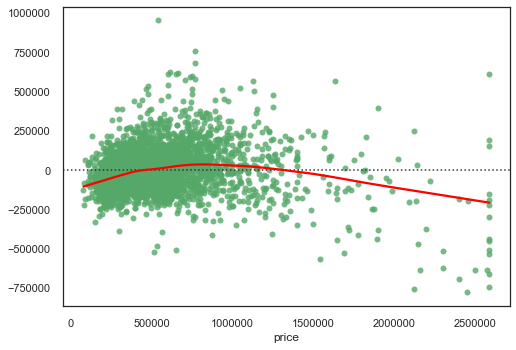

In [751]:
sns.residplot(y_test, y_test_pred, lowess=True, color="g", line_kws={"color": "red"});

# Model 1B: Linear w/ Recursive Feature Elimination

In [737]:
from sklearn.feature_selection import RFECV

In [738]:
ols = linear_model.LinearRegression()

In [739]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [740]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [741]:
len(list(removed_rfe))

4

In [742]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 158134.53109953526
Testing Root Mean Squared Error: 154541.80645668856


# Model 2: Polynomial Model

In [766]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only = True)

In [767]:
poly_data = poly.fit_transform(features_df)

In [768]:
poly_columns = poly.get_feature_names(features_df.columns)

In [769]:
df_poly2 = pd.DataFrame(poly_data, columns=poly_columns)

In [770]:
df_poly2.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,sqft_lot15,bath_per_bed,basement,zip_price_level_low,zip_price_level_medium,zip_price_level_very_high,season_sold_spring,season_sold_summer,season_sold_winter,year_sold_2015,year_since_built,year_since_renovated,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms zipcode,bedrooms sqft_lot15,bedrooms bath_per_bed,bedrooms basement,bedrooms zip_price_level_low,bedrooms zip_price_level_medium,bedrooms zip_price_level_very_high,bedrooms season_sold_spring,bedrooms season_sold_summer,bedrooms season_sold_winter,bedrooms year_sold_2015,bedrooms year_since_built,bedrooms year_since_renovated,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms zipcode,bathrooms sqft_lot15,bathrooms bath_per_bed,bathrooms basement,bathrooms zip_price_level_low,bathrooms zip_price_level_medium,bathrooms zip_price_level_very_high,bathrooms season_sold_spring,bathrooms season_sold_summer,bathrooms season_sold_winter,bathrooms year_sold_2015,bathrooms year_since_built,bathrooms year_since_renovated,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living zipcode,sqft_living sqft_lot15,sqft_living bath_per_bed,sqft_living basement,sqft_living zip_price_level_low,sqft_living zip_price_level_medium,sqft_living zip_price_level_very_high,sqft_living season_sold_spring,sqft_living season_sold_summer,sqft_living season_sold_winter,sqft_living year_sold_2015,sqft_living year_since_built,sqft_living year_since_renovated,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot zipcode,sqft_lot sqft_lot15,sqft_lot bath_per_bed,sqft_lot basement,sqft_lot zip_price_level_low,sqft_lot zip_price_level_medium,sqft_lot zip_price_level_very_high,sqft_lot season_sold_spring,sqft_lot season_sold_summer,sqft_lot season_sold_winter,sqft_lot year_sold_2015,sqft_lot year_since_built,sqft_lot year_since_renovated,floors waterfront,floors view,floors condition,floors grade,floors zipcode,floors sqft_lot15,floors bath_per_bed,floors basement,floors zip_price_level_low,floors zip_price_level_medium,floors zip_price_level_very_high,floors season_sold_spring,floors season_sold_summer,floors season_sold_winter,floors year_sold_2015,floors year_since_built,floors year_since_renovated,waterfront view,waterfront condition,waterfront grade,waterfront zipcode,waterfront sqft_lot15,waterfront bath_per_bed,waterfront basement,waterfront zip_price_level_low,waterfront zip_price_level_medium,waterfront zip_price_level_very_high,waterfront season_sold_spring,waterfront season_sold_summer,waterfront season_sold_winter,waterfront year_sold_2015,waterfront year_since_built,waterfront year_since_renovated,view condition,view grade,view zipcode,view sqft_lot15,view bath_per_bed,view basement,view zip_price_level_low,view zip_price_level_medium,view zip_price_level_very_high,view season_sold_spring,view season_sold_summer,view season_sold_winter,view year_sold_2015,view year_since_built,view year_since_renovated,condition grade,condition zipcode,condition sqft_lot15,condition bath_per_bed,condition basement,condition zip_price_level_low,condition zip_price_level_medium,condition zip_price_level_very_high,condition season_sold_spring,condition season_sold_summer,condition season_sold_winter,condition year_sold_2015,condition year_since_built,condition year_since_renovated,grade zipcode,grade sqft_lot15,grade bath_per_bed,grade basement,grade zip_price_level_low,grade zip_price_level_medium,grade zip_price_level_very_high,grade season_sold_spring,grade season_sold_summer,grade season_sold_winter,grade year_sold_2015,grade year_since_built,grade year_since_renovated,zipcode sqft_lot15,zipcode bath_per_bed,zipcode basement,zipc

In [771]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.2)

In [772]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_poly2.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_poly2.columns)

In [773]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 135102.07557902948


In [774]:
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 451297.3391999953
Training:  135102 vs. Testing:  451297


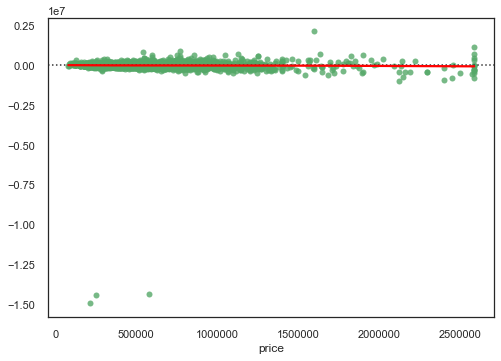

In [775]:
sns.residplot(y_test, y_pred, lowess=True, color="g", line_kws={"color": "red"});

# Model 2A: Polynomial + RFE Model

In [762]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
Fitting estimator with 229 features.
Fitting estimator with 228 features.
Fitting estimator with 227 features.
F

RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=-1, scoring='neg_mean_squared_error',
      step=1, verbose=1)

In [763]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [764]:
len(list(removed_rfe))

97

In [765]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)

Training Root Mean Squared Error: 135738.00024061743
Testing Root Mean Squared Error: 525678.3644419011


# Model 3: Lasso + Polynomial

In [776]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse_lasso01 = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse_lasso01 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse_lasso01) )
print('Testing Error: '+ str(test_rmse_lasso01) )

Training Error: 87842.14147980751
Testing Error: 140194.3531746314


/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128344470555495.95, tolerance: 162923746734.5697
  positive)


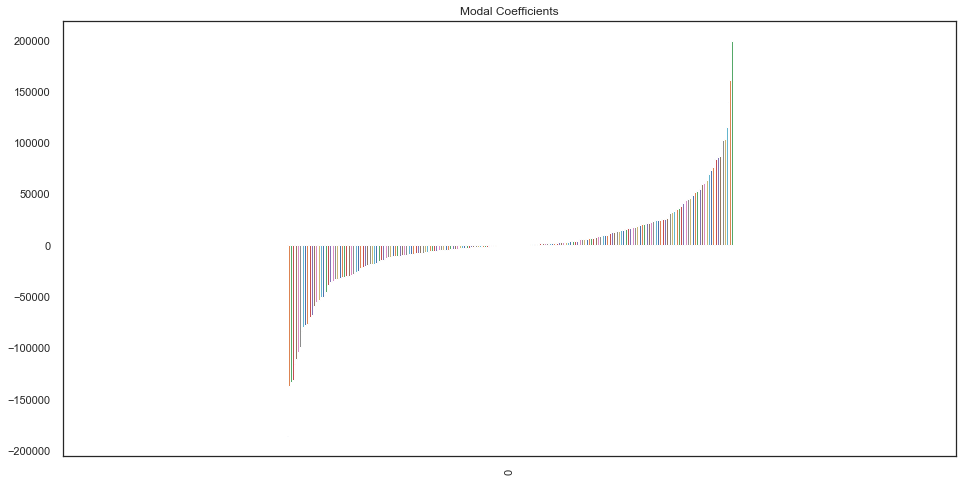

In [777]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [778]:
print('Original: \t', test_rmse, '\n',
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 451297.3391999953 
 Lasso 0.01: 	 140194.3531746314 



# Model 4: KBest + Polynomial

In [779]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=20)

selector.fit(X_train, y_train)

/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/alexzieky/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


SelectKBest(k=20, score_func=<function f_regression at 0x7fd71a657d40>)

In [780]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [781]:
list(removed_columns)


['bedrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode',
 'sqft_lot15',
 'bath_per_bed',
 'basement',
 'zip_price_level_low',
 'zip_price_level_medium',
 'zip_price_level_very_high',
 'season_sold_spring',
 'season_sold_summer',
 'season_sold_winter',
 'year_sold_2015',
 'year_since_built',
 'year_since_renovated',
 'bedrooms sqft_lot',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms view',
 'bedrooms condition',
 'bedrooms zipcode',
 'bedrooms sqft_lot15',
 'bedrooms basement',
 'bedrooms zip_price_level_low',
 'bedrooms zip_price_level_medium',
 'bedrooms zip_price_level_very_high',
 'bedrooms season_sold_spring',
 'bedrooms season_sold_summer',
 'bedrooms season_sold_winter',
 'bedrooms year_sold_2015',
 'bedrooms year_since_built',
 'bedrooms year_since_renovated',
 'bathrooms sqft_lot',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms view',
 'bathrooms sqft_lot15',
 'bathrooms bath_per_bed',
 'bathrooms basement',
 'bathrooms zip_pric

In [782]:
list(selected_columns)

['bathrooms',
 'sqft_living',
 'grade',
 'bedrooms bathrooms',
 'bedrooms sqft_living',
 'bedrooms grade',
 'bedrooms bath_per_bed',
 'bathrooms sqft_living',
 'bathrooms condition',
 'bathrooms grade',
 'bathrooms zipcode',
 'sqft_living floors',
 'sqft_living condition',
 'sqft_living grade',
 'sqft_living zipcode',
 'sqft_living bath_per_bed',
 'sqft_living zip_price_level_very_high',
 'condition grade',
 'grade zipcode',
 'grade bath_per_bed']

In [783]:
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])

trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))

print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 193453.2212349107
Testing Root Mean Squared Error: 183694.59146258322


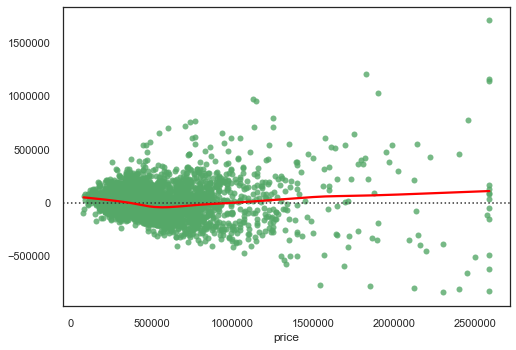

In [784]:
sns.residplot(y_test, y_kbest, lowess=True, color="g", line_kws={"color": "red"});

In [785]:
print('Original: \t', test_rmse, '\n',
      'RFE: \t', testRFE_rmse, '\n',
      "KBest: \t", testK_rmse, '\n',
      "Lasso 0.01: \t",  test_rmse_lasso01, '\n')

Original: 	 451297.3391999953 
 RFE: 	 525678.3644419011 
 KBest: 	 183694.59146258322 
 Lasso 0.01: 	 140194.3531746314 



### 5.7) Determine if your model is overfit.

In [59]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [60]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [61]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/